## Practical Work 4

For this practical work, the student will have to develop a Python program that is able to implement the accelerated gradient descent methods with adaptive learning rate <b>(Adagrad, RMSProp, and Adam)</b> in order to achieve the linear regression of a set of datapoints.
##### Please notice that we will apply these algorithm to single variable LR.

#### Import numpy, matplotlib.pyplot and make it inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

To have a dataset or set of data points, the student must generate a pair of arrays <b>X</b> and <b>y</b> with the values in <b>X</b> equally distributed between <b>0</b> and <b>20</b> and the values in <b>y</b> such that:
<b>yi = a*xi + b (and a = -1, b = 2)</b>


In [3]:
X = np.linspace(0,20)
X

array([ 0.        ,  0.40816327,  0.81632653,  1.2244898 ,  1.63265306,
        2.04081633,  2.44897959,  2.85714286,  3.26530612,  3.67346939,
        4.08163265,  4.48979592,  4.89795918,  5.30612245,  5.71428571,
        6.12244898,  6.53061224,  6.93877551,  7.34693878,  7.75510204,
        8.16326531,  8.57142857,  8.97959184,  9.3877551 ,  9.79591837,
       10.20408163, 10.6122449 , 11.02040816, 11.42857143, 11.83673469,
       12.24489796, 12.65306122, 13.06122449, 13.46938776, 13.87755102,
       14.28571429, 14.69387755, 15.10204082, 15.51020408, 15.91836735,
       16.32653061, 16.73469388, 17.14285714, 17.55102041, 17.95918367,
       18.36734694, 18.7755102 , 19.18367347, 19.59183673, 20.        ])

In [4]:
a=-1
b=2
y=a*X+b
y

array([  2.        ,   1.59183673,   1.18367347,   0.7755102 ,
         0.36734694,  -0.04081633,  -0.44897959,  -0.85714286,
        -1.26530612,  -1.67346939,  -2.08163265,  -2.48979592,
        -2.89795918,  -3.30612245,  -3.71428571,  -4.12244898,
        -4.53061224,  -4.93877551,  -5.34693878,  -5.75510204,
        -6.16326531,  -6.57142857,  -6.97959184,  -7.3877551 ,
        -7.79591837,  -8.20408163,  -8.6122449 ,  -9.02040816,
        -9.42857143,  -9.83673469, -10.24489796, -10.65306122,
       -11.06122449, -11.46938776, -11.87755102, -12.28571429,
       -12.69387755, -13.10204082, -13.51020408, -13.91836735,
       -14.32653061, -14.73469388, -15.14285714, -15.55102041,
       -15.95918367, -16.36734694, -16.7755102 , -17.18367347,
       -17.59183673, -18.        ])

#### Plot X vs. y

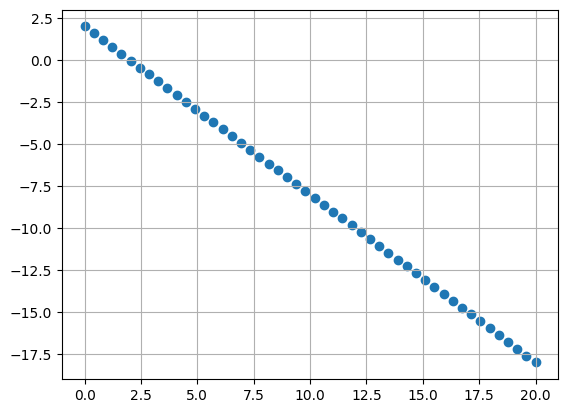

In [5]:
plt.scatter(X,y)
plt.grid(True)

## Adagrad

### For a single variable linear regression ML model, build a function to find the optimum Theta_0 and Theta_1 parameters using Adagrad optimization algorithm.
#### The funtion should have the following input parameters:
##### 1. Input data as a matrix (or vector based on your data).
##### 2. Target label as a vector.
##### 3. Learning rate.
##### 4. Epsilon.
##### 5. Maximum number of iterations (Epochs).
#### The funtion should return the following outputs:
##### 1. All predicted Theta_0 in all iterations.
##### 2. All predicted Theta_1 in all iterations.
##### 3. Corresponding loss for each Theta_0 and Theta_1 predictions.
##### 4.All hypothesis outputs (prdicted labels) for each Theta_0 and Theta_1 predictions.
##### 5.Final Optimum values of Theta_0 and Theta_1.
#### Choose the suitable number of iterations, learning rate, Epsilon, and stop criteria.
#### Calculate r2 score. Shouldn't below 0.9
#### Plot the required curves (loss-epochs, loss-theta0, loss-theta1, all fitted lines per epoch (single graph), best fit line)
#### Try different values of the huperparameters and see the differnce in your results.

##### The following results uses alpha = 0.05, epsilon =  1e-08, and max. iterations = 500.

In [6]:
from numpy import sqrt

In [7]:
theta_0 = 0
theta_1 = 0
v_0 = 0
v_1 = 0
epsilon = 1e-08
alpha = 0.05
max_iter = 500
grad_check = 0.001
cost_check = 0.001
loss_list=[]
thetas_0=[]
thetas_1=[]
m = len(X)
for i in range(max_iter):
  print(f"++++++++++++++++++++++ Iteration {i} +++++++++++++++++++++++++++\n")
  h_x = theta_0 + theta_1 * X
  error = h_x - y
  loss = (1/(2*m)) * np.sum(error**2)
  thetas_0.append(theta_0)
  thetas_1.append(theta_1)
  loss_list.append(loss)
  gradient_0 = (1/m) * np.sum(error)
  gradient_1 = (1/m) * np.sum(error * X)
  print("h(x):\n ", h_x)
  print("\nError_vector:\n ",error)
  print("\nJ: \n",loss)
  print("\nGradient:\n",np.array([[gradient_0], [gradient_1]]))
  grad_norm = np.linalg.norm(np.array([[gradient_0], [gradient_1]]))
  print("\nGradient norm:\n",grad_norm)


  if grad_norm < grad_check:
      print(f"Gradient Descent converged at iteration {i}")
      break
  if i!=0 and abs(loss_list[-1] - loss_list[-2]) < cost_check:
      print(f"Converged at iteration {i}")
      break

  v_0 = v_0 + (gradient_0**2)
  v_1 = v_1 + (gradient_1**2)
  theta_0 = theta_0 - (alpha / (sqrt(v_0) + epsilon)) * gradient_0
  theta_1 = theta_1 - (alpha / (sqrt(v_1) + epsilon)) * gradient_1

Streaming output truncated to the last 5000 lines.

Gradient norm:
 15.197271849021698
++++++++++++++++++++++ Iteration 120 +++++++++++++++++++++++++++

h(x):
  [ -0.6316722   -0.91466532  -1.19765845  -1.48065157  -1.7636447
  -2.04663782  -2.32963095  -2.61262407  -2.89561719  -3.17861032
  -3.46160344  -3.74459657  -4.02758969  -4.31058282  -4.59357594
  -4.87656907  -5.15956219  -5.44255532  -5.72554844  -6.00854157
  -6.29153469  -6.57452782  -6.85752094  -7.14051406  -7.42350719
  -7.70650031  -7.98949344  -8.27248656  -8.55547969  -8.83847281
  -9.12146594  -9.40445906  -9.68745219  -9.97044531 -10.25343844
 -10.53643156 -10.81942469 -11.10241781 -11.38541093 -11.66840406
 -11.95139718 -12.23439031 -12.51738343 -12.80037656 -13.08336968
 -13.36636281 -13.64935593 -13.93234906 -14.21534218 -14.49833531]

Error_vector:
  [-2.63167220e+00 -2.50650206e+00 -2.38133192e+00 -2.25616178e+00
 -2.13099163e+00 -2.00582149e+00 -1.88065135e+00 -1.75548121e+00
 -1.63031107e+00 -1.50514093e+00

In [8]:
from sklearn.metrics import r2_score
r2_score(y,h_x)

0.9484638125790851

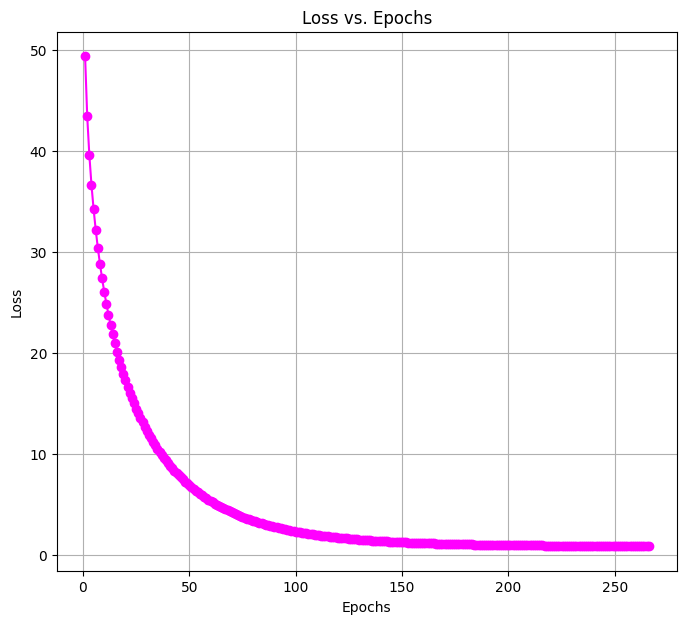

In [9]:
def loss_vs_epochs(loss_list):
    epochs = range(1, len(loss_list) + 1)
    plt.figure(figsize=(8, 7))
    plt.plot(epochs, loss_list, marker='o', linestyle='-',color='magenta')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Loss vs. Epochs')
    plt.grid(True)
    plt.show()
loss_vs_epochs(loss_list)

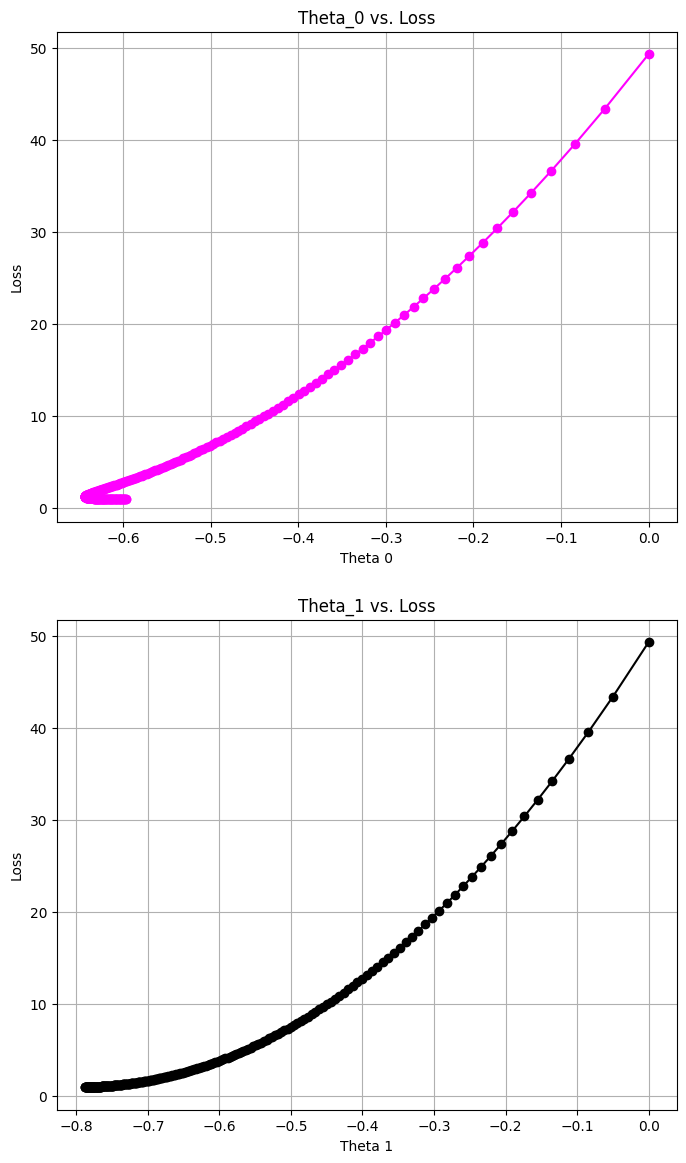

In [10]:
def theta_vs_loss(theta_0,theta_1,loss_list):
  epochs = range(1, len(loss_list) + 1)
  plt.figure(figsize=(8, 14))
  plt.subplot(2,1,1)
  plt.plot(thetas_0, loss_list, marker='o', linestyle='-',color='magenta')
  plt.xlabel('Theta 0')
  plt.ylabel('Loss')
  plt.title('Theta_0 vs. Loss')
  plt.grid(True)
  plt.subplot(2,1,2)
  plt.plot(thetas_1, loss_list, marker='o', linestyle='-',color='black')
  plt.xlabel('Theta 1')
  plt.ylabel('Loss')
  plt.title('Theta_1 vs. Loss')
  plt.grid(True)
  plt.show()
theta_vs_loss(thetas_0,thetas_1,loss_list)

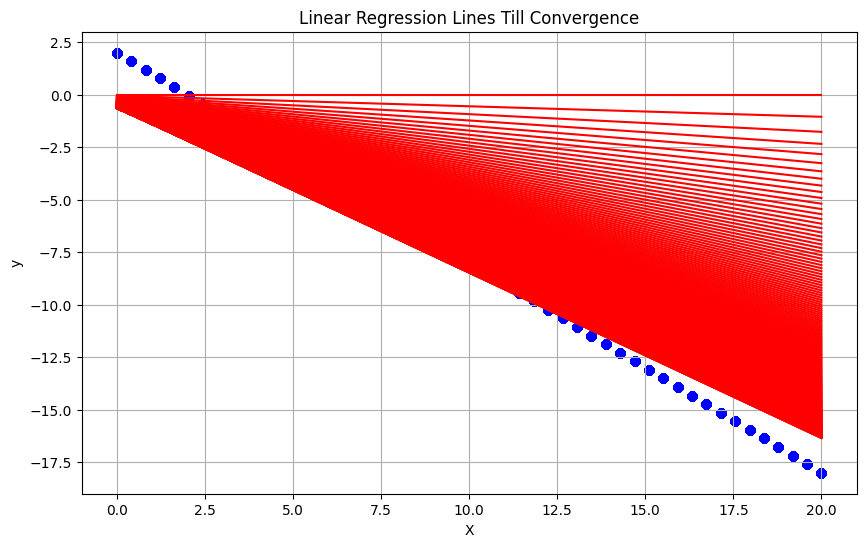

In [11]:
def regression_lines(thetas_0, thetas_1, X, y):
    plt.figure(figsize=(10, 6))
    for i in range(len(thetas_0)):
        plt.scatter(X, y, color='blue')
        plt.plot(X, thetas_0[i] + thetas_1[i] * X,color='red')
        plt.xlabel('X')
        plt.ylabel('y')
        plt.title('Linear Regression Lines Till Convergence')
        plt.grid(True)

    plt.show()
regression_lines(thetas_0, thetas_1, X, y)

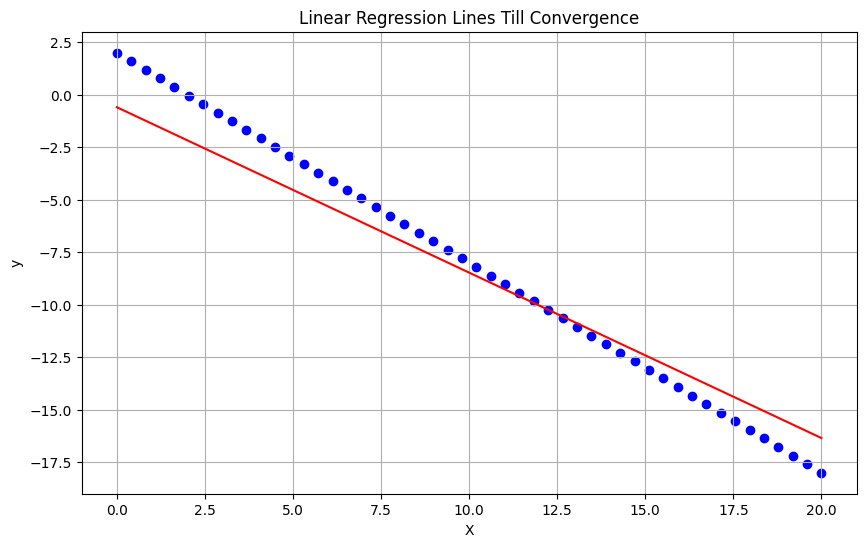

In [12]:
def best_regression_line(theta_0, theta_1, X, y):
    plt.figure(figsize=(10, 6))
    plt.scatter(X, y, color='blue')
    plt.plot(X, theta_0 + theta_1 * X,color='red')
    plt.xlabel('X')
    plt.ylabel('y')
    plt.title('Linear Regression Lines Till Convergence')
    plt.grid(True)

    plt.show()
best_regression_line(theta_0, theta_1, X, y)

##### The following results uses alpha = 0.005, epsilon =  1e-08, and max. iterations = 5000.

In [15]:
import numpy as np

def adagrad(X, y, theta_0=0, theta_1=0, alpha=0.005, epsilon=1e-08, max_iter=5000, grad_check=0.001, cost_check=0.001):
    m = len(X)
    v_0 = 0
    v_1 = 0
    loss_list = []
    thetas_0 = []
    thetas_1 = []

    for i in range(max_iter):
        h_x = theta_0 + theta_1 * X
        error = h_x - y
        loss = (1/(2*m)) * np.sum(error**2)
        thetas_0.append(theta_0)
        thetas_1.append(theta_1)
        loss_list.append(loss)
        gradient_0 = (1/m) * np.sum(error)
        gradient_1 = (1/m) * np.sum(error * X)

        grad_norm = np.linalg.norm(np.array([[gradient_0], [gradient_1]]))

        if grad_norm < grad_check:
            print(f"Gradient Descent converged at iteration {i}")
            break
        if i != 0 and abs(loss_list[-1] - loss_list[-2]) < cost_check:
            print(f"Converged at iteration {i}")
            break

        v_0 = v_0 + (gradient_0**2)
        v_1 = v_1 + (gradient_1**2)
        theta_0 = theta_0 - (alpha / (np.sqrt(v_0) + epsilon)) * gradient_0
        theta_1 = theta_1 - (alpha / (np.sqrt(v_1) + epsilon)) * gradient_1

    return thetas_0, thetas_1, loss_list, theta_0, theta_1, loss, h_x




In [16]:
thetas_0, thetas_1, loss_list, theta_0, theta_1, loss,h_x = adagrad(X, y)

In [17]:
r2_score(y,h_x)

0.7095974929894115

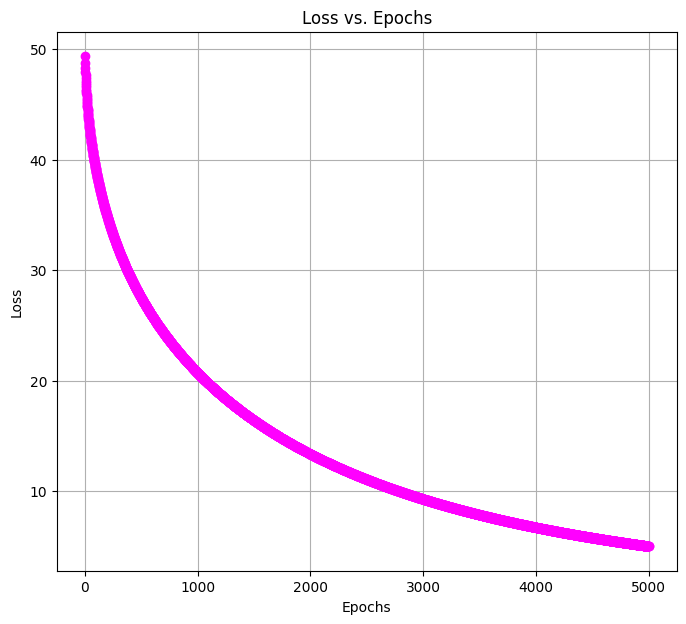

In [18]:
loss_vs_epochs(loss_list)

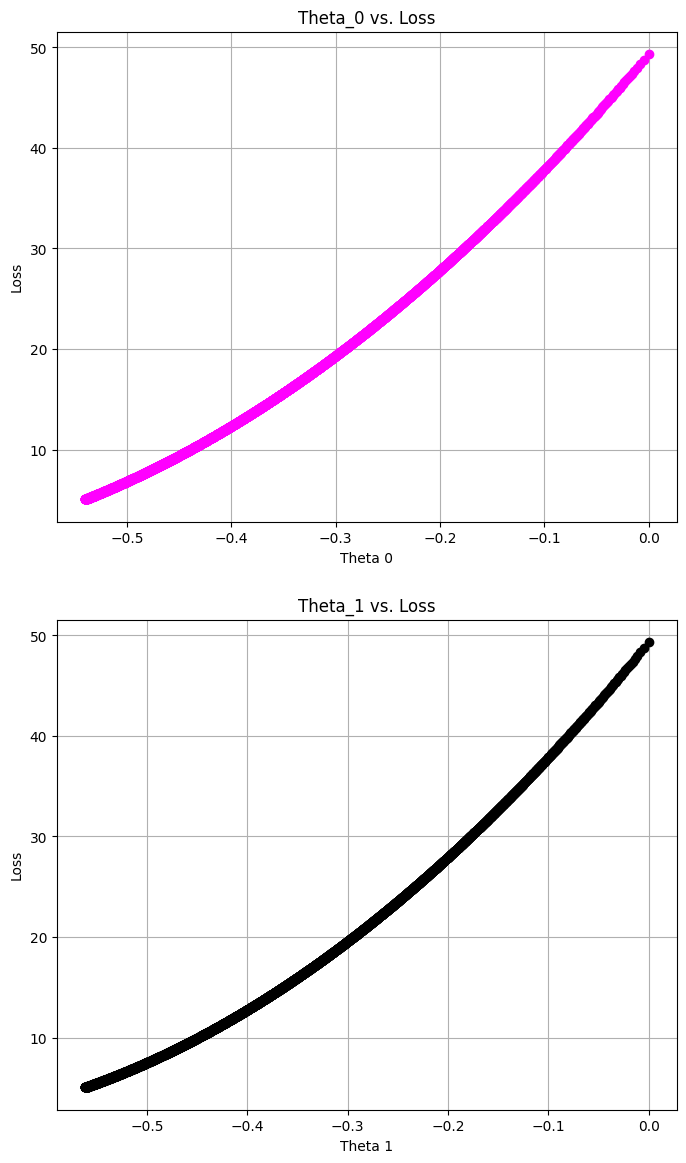

In [19]:
theta_vs_loss(theta_0,theta_1,loss_list)

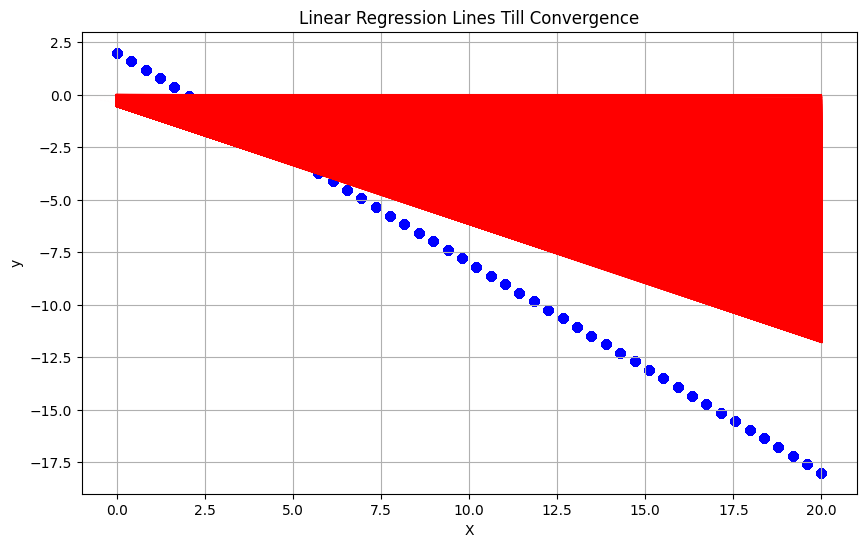

In [20]:
regression_lines(thetas_0,thetas_1,X,y)

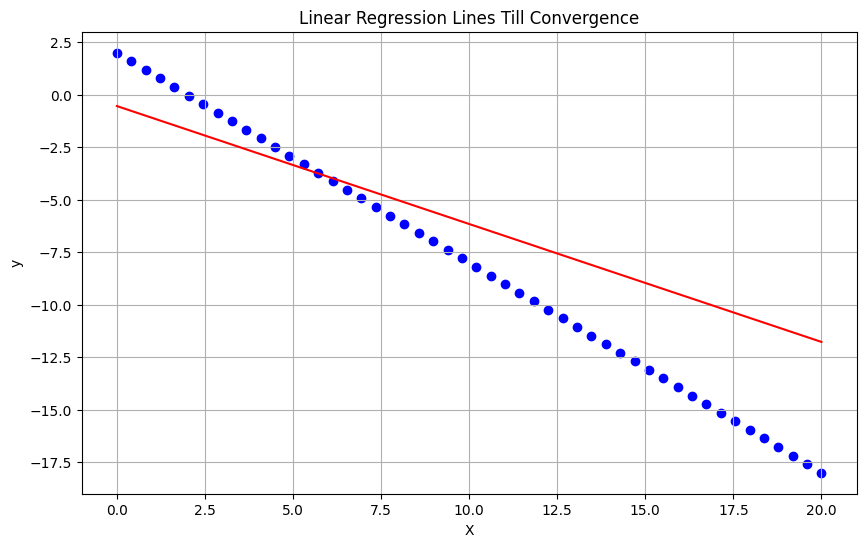

In [21]:
best_regression_line(theta_0,theta_1,X,y)

##### The following results uses alpha = 0.0005, epsilon =  1e-08, and max. iterations = 5000.

In [22]:
thetas_0, thetas_1, loss_list, theta_0, theta_1, loss,h_x = adagrad(X, y, alpha=0.0005, epsilon= 1e-08, max_iter = 5000)

Converged at iteration 3106


In [23]:
r2_score(y,h_x)

-1.4736441832884104

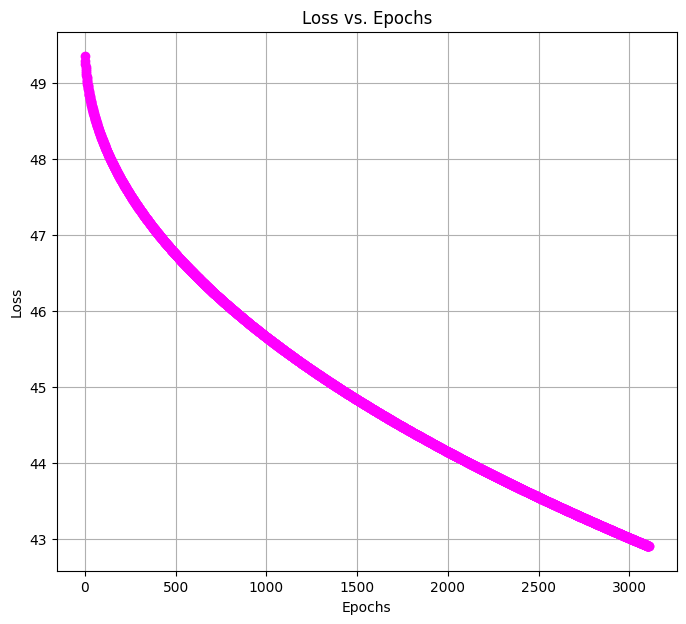

In [24]:
loss_vs_epochs(loss_list)

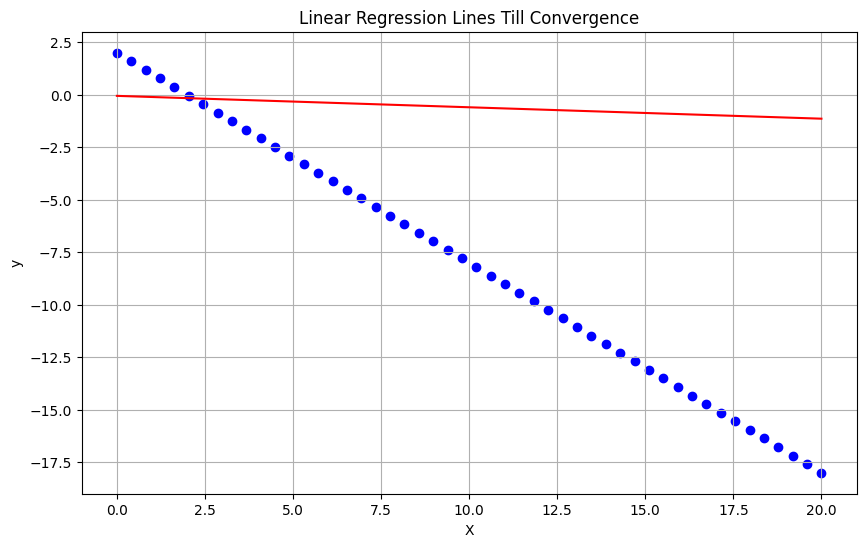

In [ ]:
best_regression_line(theta_0,theta_1,X,y)

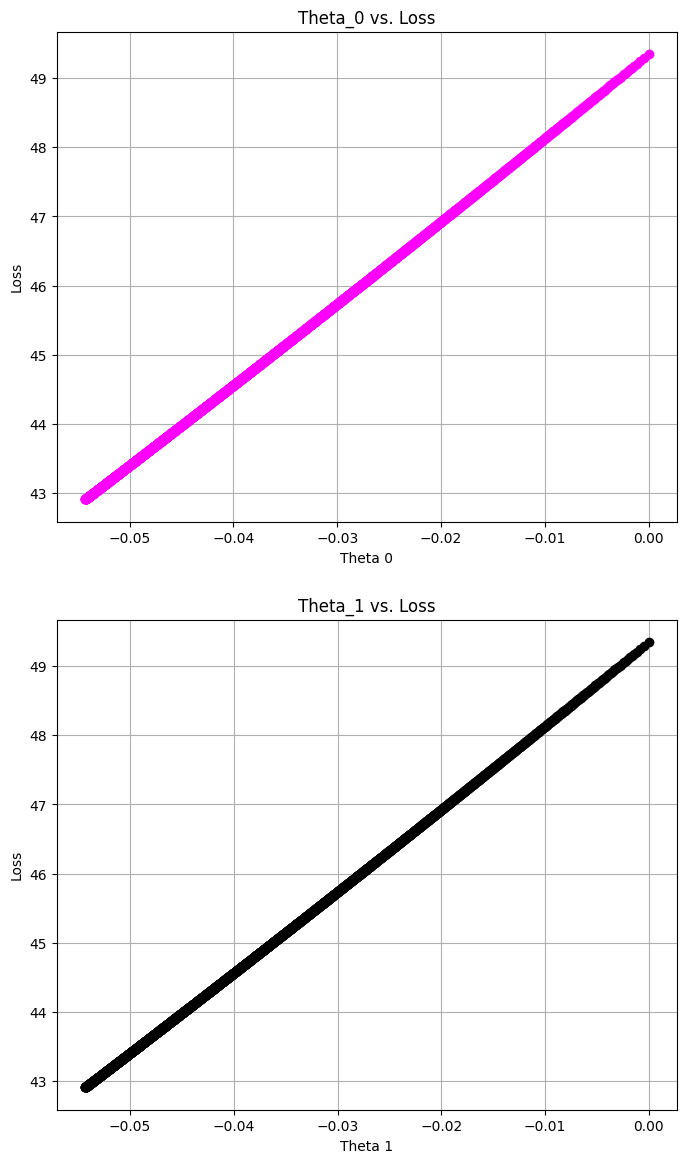

In [ ]:
theta_vs_loss(theta_0,theta_1,loss_list)

## RMSProp

### Update the previos implementation to be RMSProp.
#### Compare your results with Adagrad results.

In [29]:
def rmsprop(X, y, theta_0=0, theta_1=0, alpha=0.05, epsilon=1e-08, B=0.9, max_iter=500, grad_check=0.001, cost_check=0.001):
    m = len(X)
    v_0 = 0
    v_1 = 0
    loss_list = []
    thetas_0 = []
    thetas_1 = []

    for i in range(max_iter):
        h_x = theta_0 + theta_1 * X
        error = h_x - y
        loss = (1/(2*m)) * np.sum(error**2)
        thetas_0.append(theta_0)
        thetas_1.append(theta_1)
        loss_list.append(loss)
        gradient_0 = (1/m) * np.sum(error)
        gradient_1 = (1/m) * np.sum(error * X)

        grad_norm = np.linalg.norm(np.array([[gradient_0], [gradient_1]]))

        if grad_norm < grad_check:
            print(f"Gradient Descent converged at iteration {i}")
            break
        if i != 0 and abs(loss_list[-1] - loss_list[-2]) < cost_check:
            print(f"Converged at iteration {i}")
            break

        v_0 = B * v_0 + (1 - B) * (gradient_0**2)
        v_1 = B * v_1 + (1 - B) * (gradient_1**2)
        theta_0 = theta_0 - (alpha / (np.sqrt(v_0) + epsilon)) * gradient_0
        theta_1 = theta_1 - (alpha / (np.sqrt(v_1) + epsilon)) * gradient_1

    return thetas_0, thetas_1, loss_list, loss, h_x, theta_0, theta_1

##### The following results uses alpha = 0.05, beta = 0.9, epsilon =  1e-08, and max. iterations = 500.

In [30]:
thetas_0, thetas_1, loss_list, loss, h_x, theta_0, theta_1 = rmsprop(X, y)

Converged at iteration 102


In [31]:
r2_score(y,h_x)

0.9993602095484933

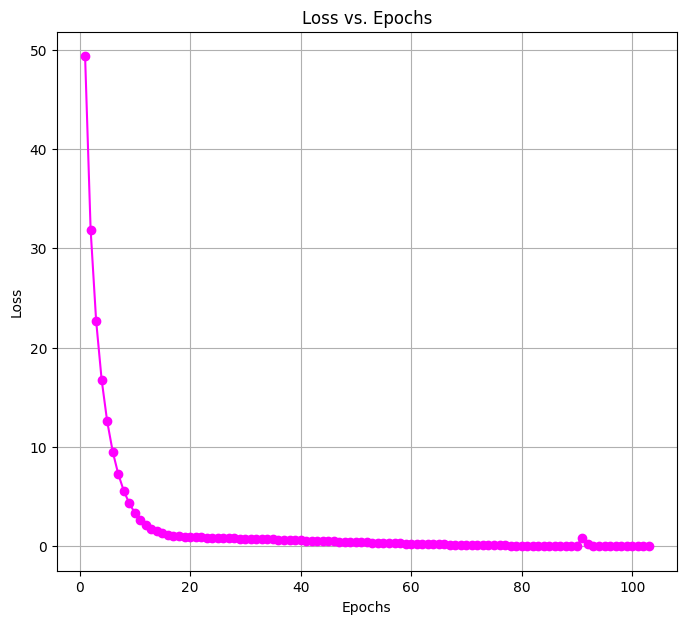

In [32]:
loss_vs_epochs(loss_list)

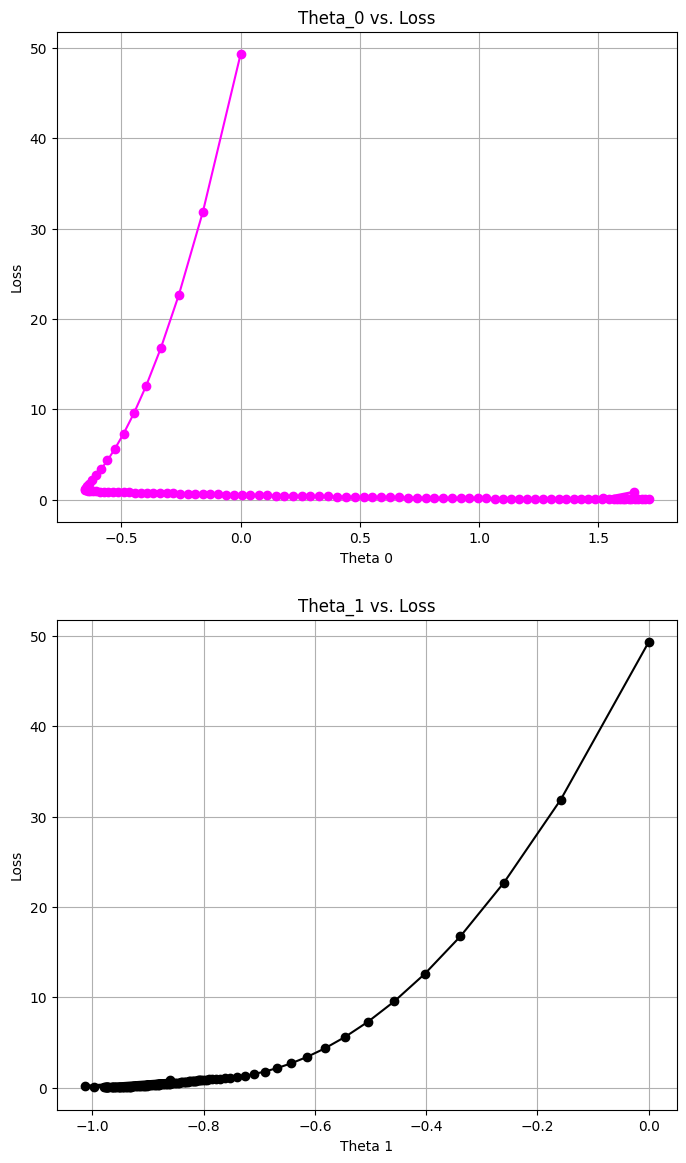

In [33]:
theta_vs_loss(theta_0,theta_1,loss_list)

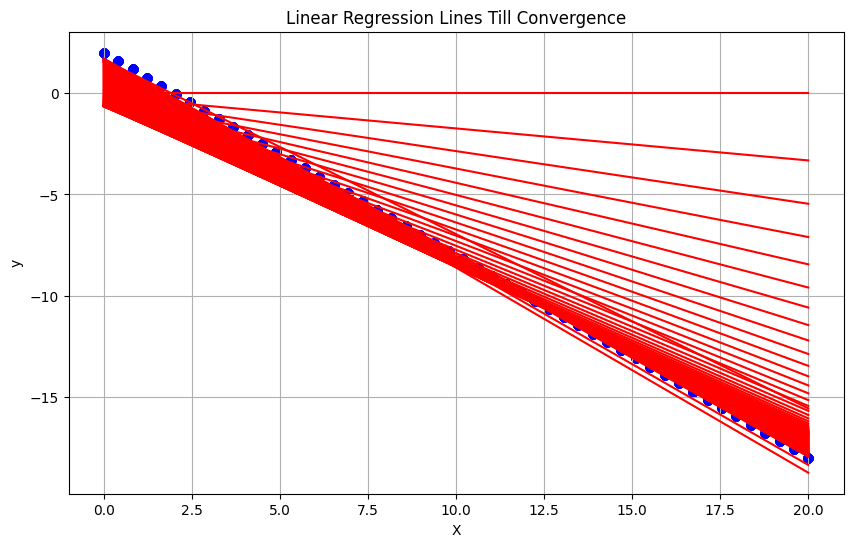

In [ ]:
regression_lines(thetas_0,thetas_1,X,y)

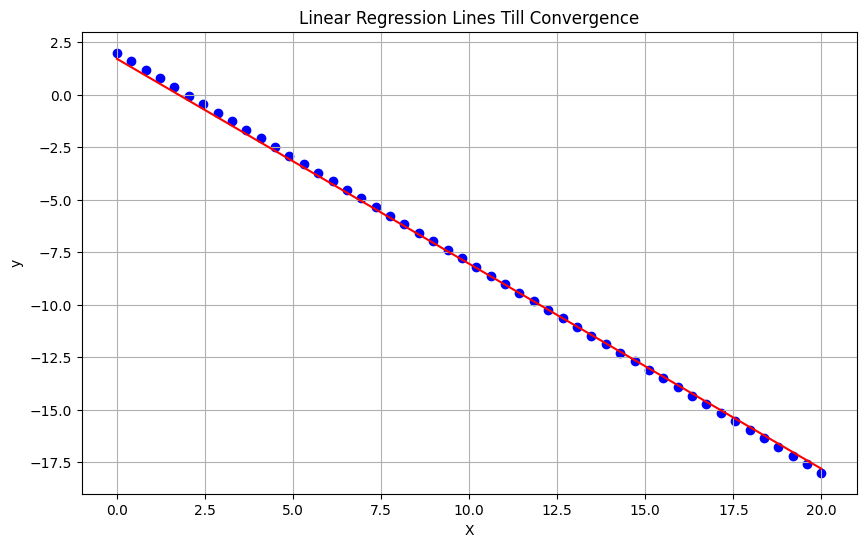

In [ ]:
best_regression_line(theta_0,theta_1,X,y)

##### The following results uses alpha = 0.005, beta = 0.9, epsilon =  1e-08, and max. iterations = 5000.

In [34]:
thetas_0, thetas_1, loss_list, loss, h_x, theta_0, theta_1 = rmsprop(X, y,alpha=0.005, B= 0.9, epsilon= 1e-08, max_iter= 5000)

Converged at iteration 539


In [35]:
r2_score(y,h_x)

0.9948527107478715

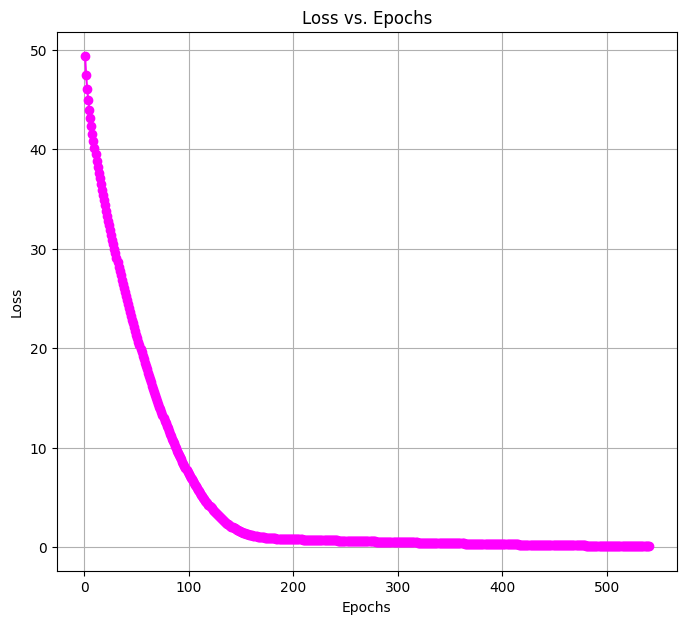

In [ ]:
loss_vs_epochs(loss_list)

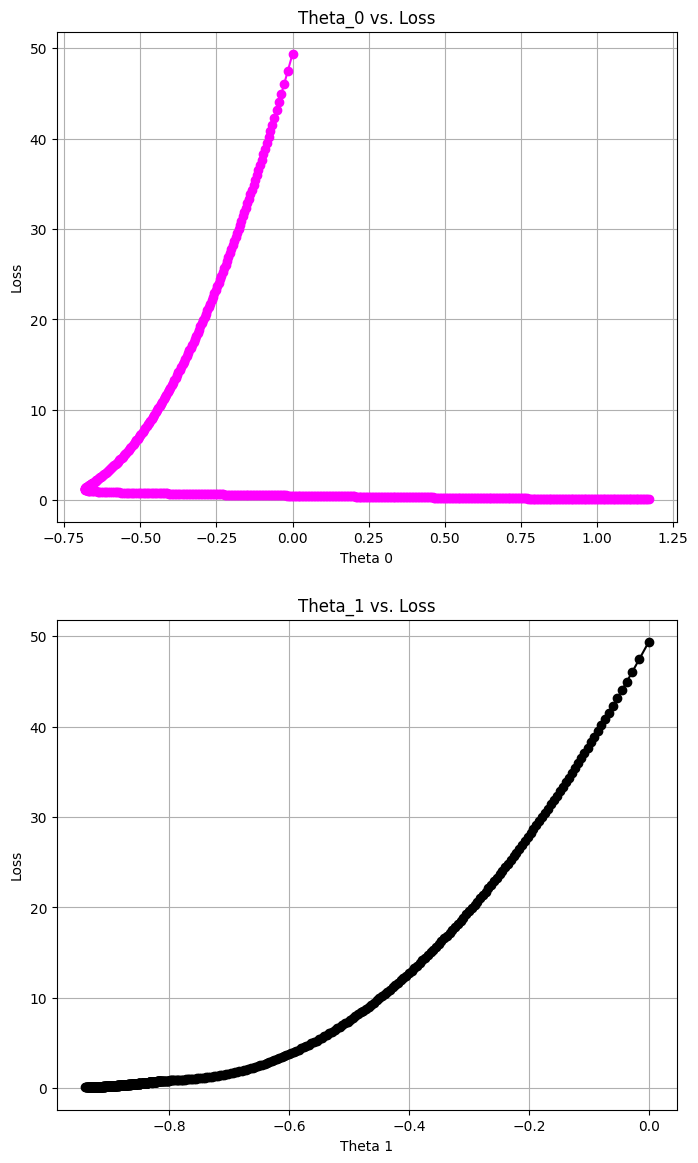

In [ ]:
theta_vs_loss(theta_0,theta_1,loss_list)

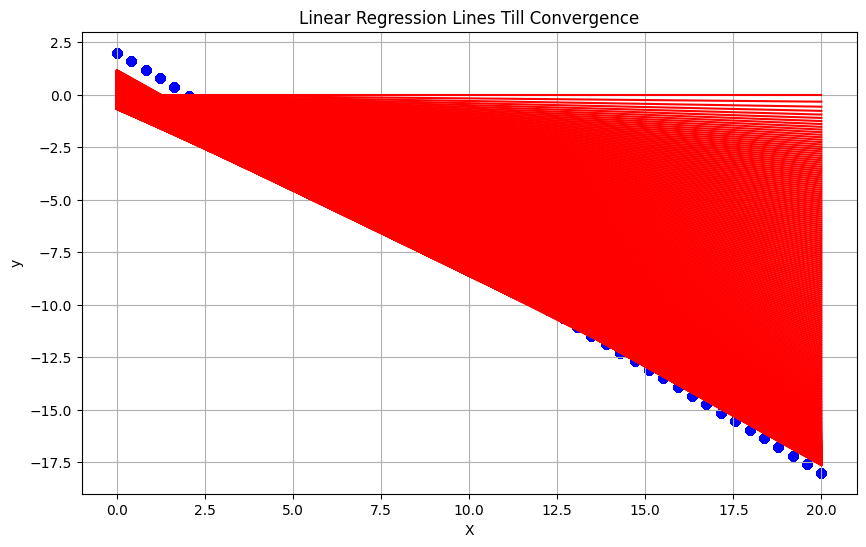

In [ ]:
regression_lines(thetas_0,thetas_1,X,y)

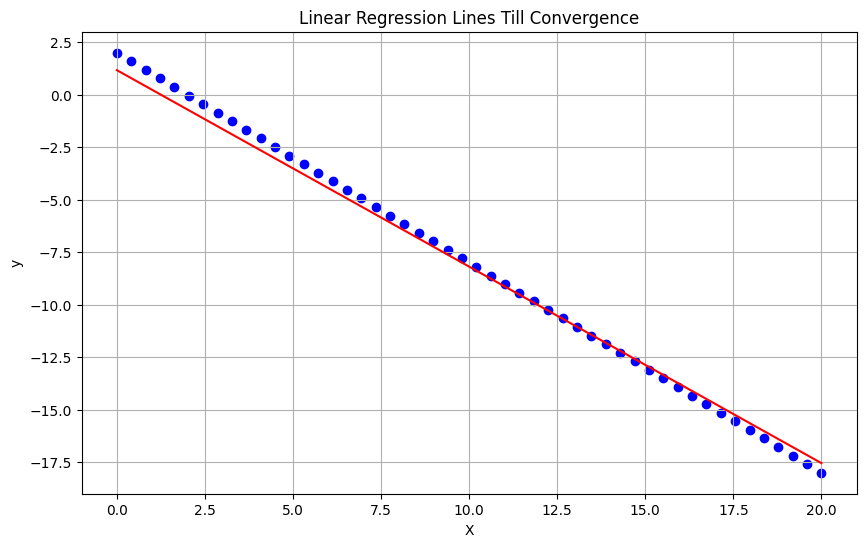

In [ ]:
best_regression_line(theta_0,theta_1,X,y)

##### The following results uses alpha = 0.0005, beta = 0.9, epsilon =  1e-08, and max. iterations = 5000.

In [36]:
thetas_0, thetas_1, loss_list, loss, h_x, theta_0, theta_1 = rmsprop(X, y,alpha=0.0005, B= 0.9, epsilon= 1e-08, max_iter= 5000)

Converged at iteration 1609


In [37]:
r2_score(y,h_x)

0.9476184845511563

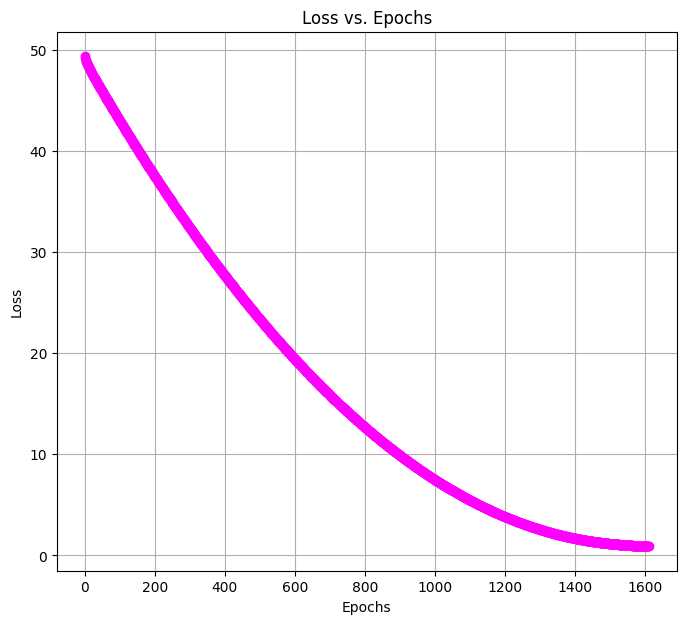

In [ ]:
loss_vs_epochs(loss_list)

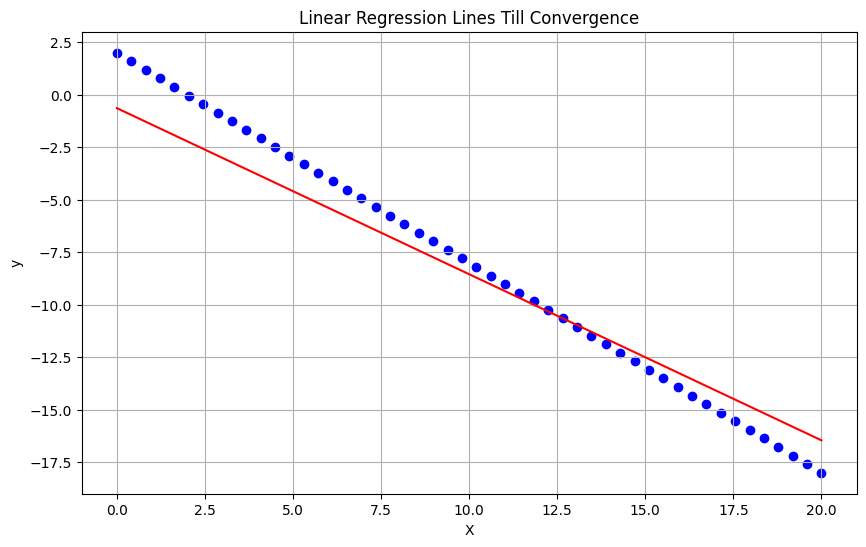

In [ ]:
best_regression_line(theta_0,theta_1,X,y)

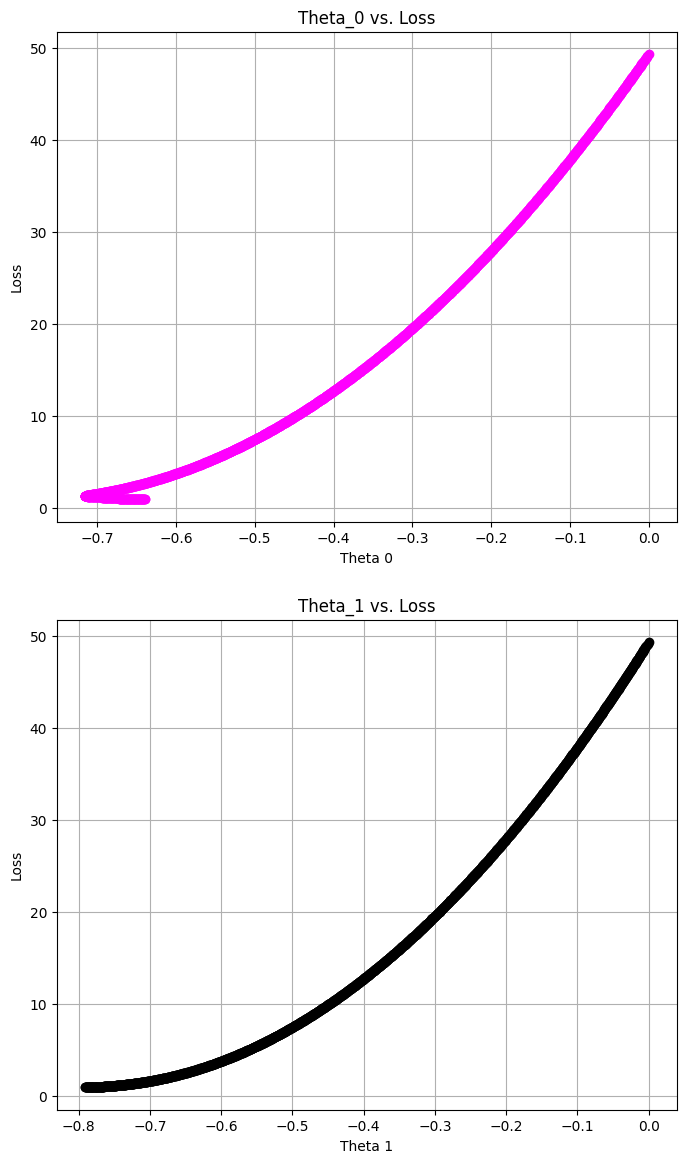

In [ ]:
theta_vs_loss(theta_0,theta_1,loss_list)

## Adam

### Update the previos implementation to be Adam.
#### Compare your results with Adagrad and RMSProp results.

In [39]:
def adam(X, y, theta_0=0, theta_1=0, alpha=0.05, epsilon=1e-08, B_1=0.2, B_2=0.7, max_iter=500, grad_check=0.001, cost_check=0.001):
    m = len(X)
    v_0 = 0
    v_1 = 0
    m_0 = 0
    m_1 = 0
    loss_list = []
    thetas_0 = []
    thetas_1 = []

    for i in range(max_iter):
        h_x = theta_0 + theta_1 * X
        error = h_x - y
        loss = (1/(2*m)) * np.sum(error**2)
        thetas_0.append(theta_0)
        thetas_1.append(theta_1)
        loss_list.append(loss)
        gradient_0 = (1/m) * np.sum(error)
        gradient_1 = (1/m) * np.sum(error * X)

        grad_norm = np.linalg.norm(np.array([[gradient_0], [gradient_1]]))

        if grad_norm < grad_check:
            print(f"Gradient Descent converged at iteration {i}")
            break
        if i != 0 and abs(loss_list[-1] - loss_list[-2]) < cost_check:
            print(f"Converged at iteration {i}")
            break

        m_0 = B_1 * m_0 + (1 - B_1) * gradient_0
        m_1 = B_1 * m_1 + (1 - B_1) * gradient_1
        m_hat_0 = m_0 / (1 - B_1**(i+1))
        m_hat_1 = m_1 / (1 - B_1**(i+1))
        v_0 = B_2 * v_0 + (1 - B_2) * (gradient_0**2)
        v_1 = B_2 * v_1 + (1 - B_2) * (gradient_1**2)
        v_hat_0 = v_0 / (1 - B_2**(i+1))
        v_hat_1 = v_1 / (1 - B_2**(i+1))
        theta_0 = theta_0 - (alpha / (np.sqrt(v_hat_0) + epsilon)) * m_hat_0
        theta_1 = theta_1 - (alpha / (np.sqrt(v_hat_1) + epsilon)) * m_hat_1

    return thetas_0, thetas_1, loss_list, loss, h_x, theta_0, theta_1

In [40]:
thetas_0, thetas_1, loss_list, loss, h_x, theta_0, theta_1 = adam(X, y)

Converged at iteration 82


##### The following results uses alpha = 0.05, beta1 = 0.2, beta2 = 0.7, epsilon =  1e-08, and max. iterations = 500.

In [41]:
r2_score(y,h_x)

0.9989675218213928

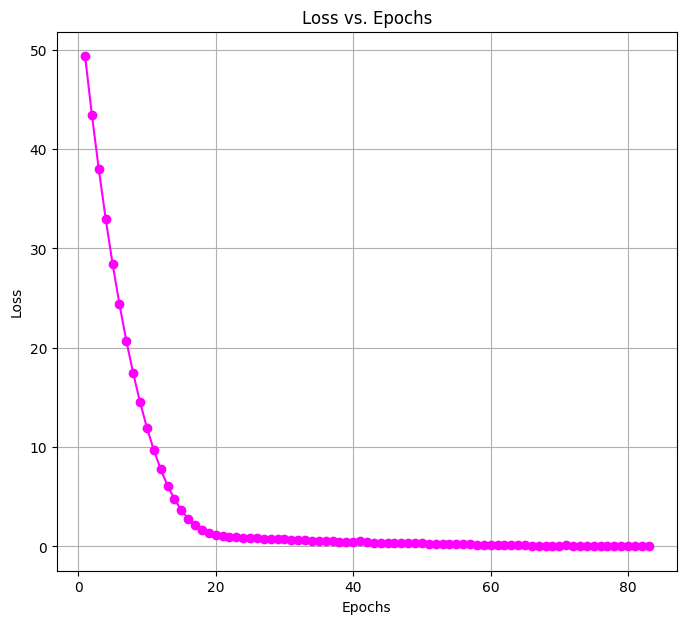

In [ ]:
loss_vs_epochs(loss_list)

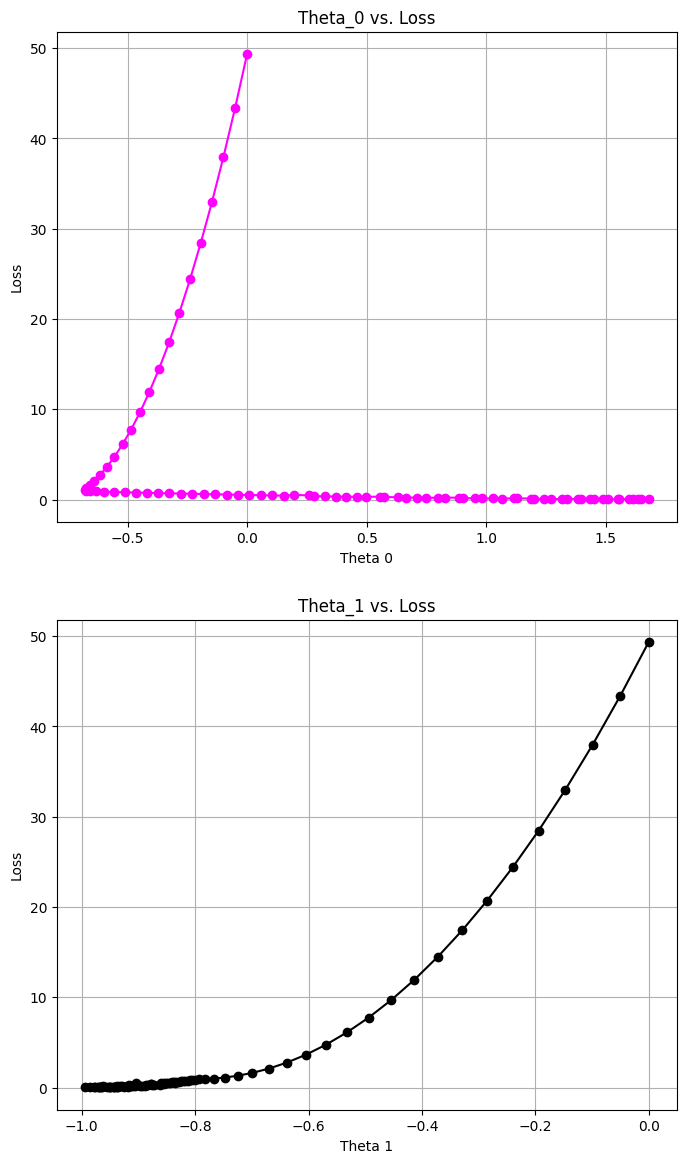

In [ ]:
theta_vs_loss(theta_0,theta_1,loss_list)

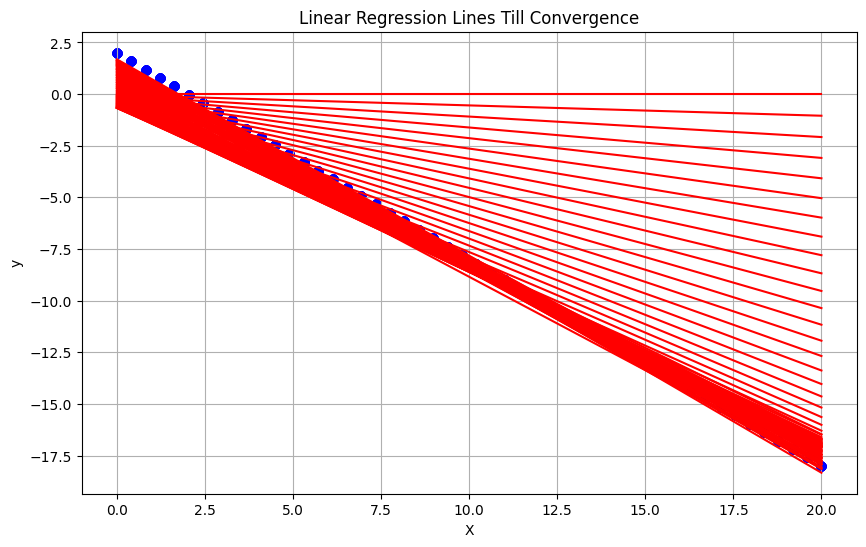

In [ ]:
regression_lines(thetas_0,thetas_1,X,y)

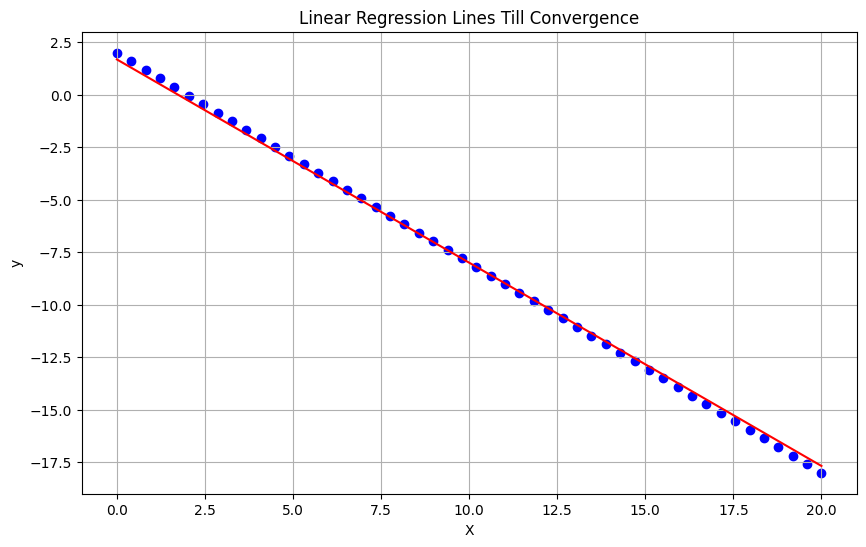

In [ ]:
best_regression_line(theta_0,theta_1,X,y)

##### The following results uses alpha = 0.005, beta1 = 0.5, beta2 = 0.8, epsilon =  1e-08, and max. iterations = 500.

In [42]:
thetas_0, thetas_1, loss_list, loss, h_x, theta_0, theta_1 = adam(X, y, alpha= 0.005, B_1=0.5, B_2=0.8, epsilon=1e-08, max_iter=500)

In [43]:
r2_score(y,h_x)

0.992630779461015

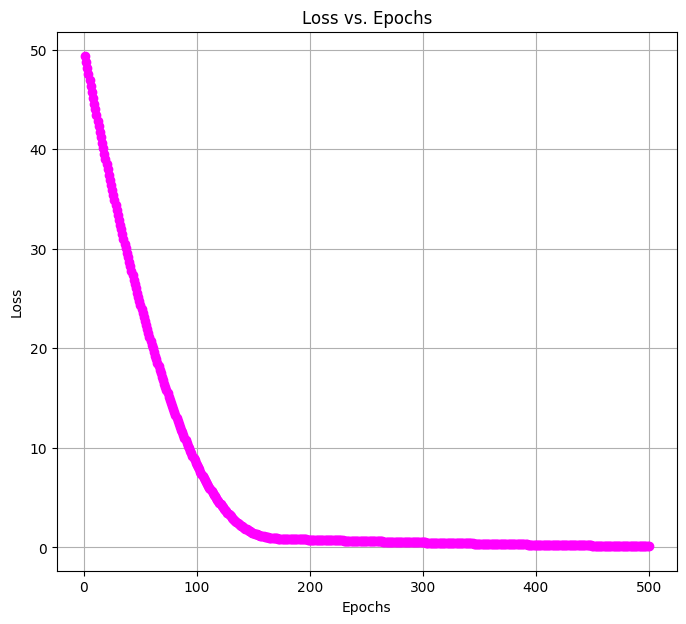

In [ ]:
loss_vs_epochs(loss_list)

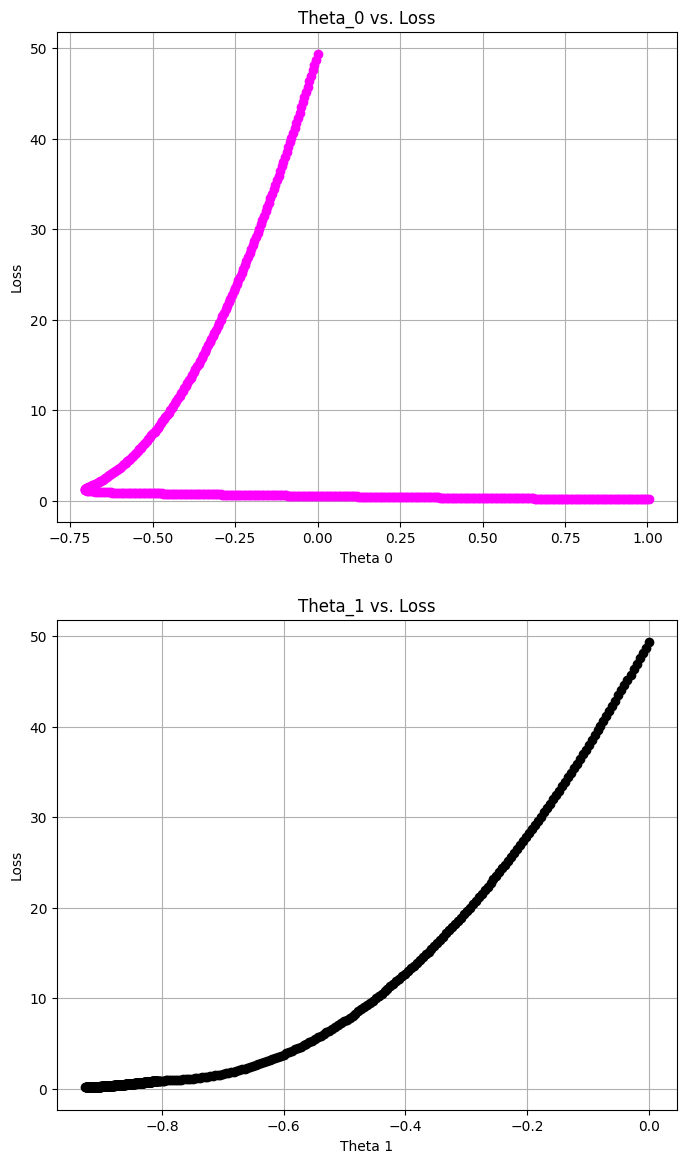

In [ ]:
theta_vs_loss(theta_0,theta_1,loss_list)

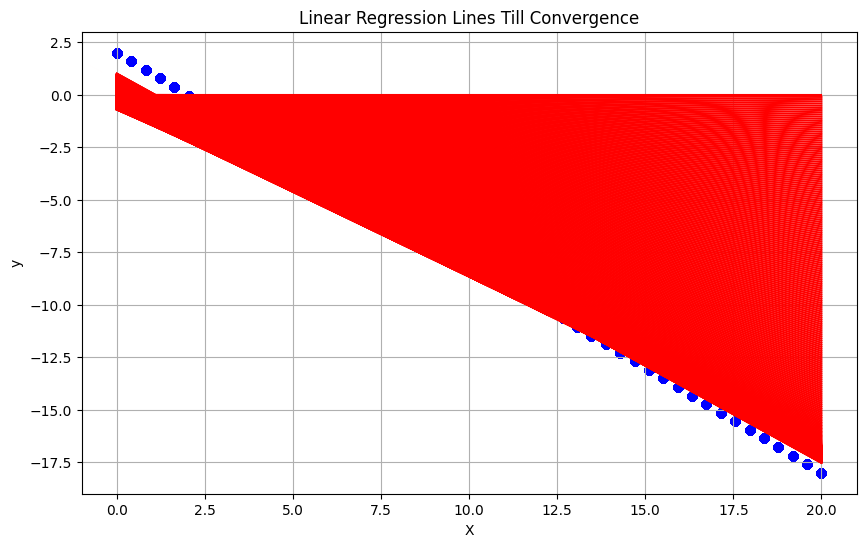

In [ ]:
regression_lines(thetas_0,thetas_1,X,y)

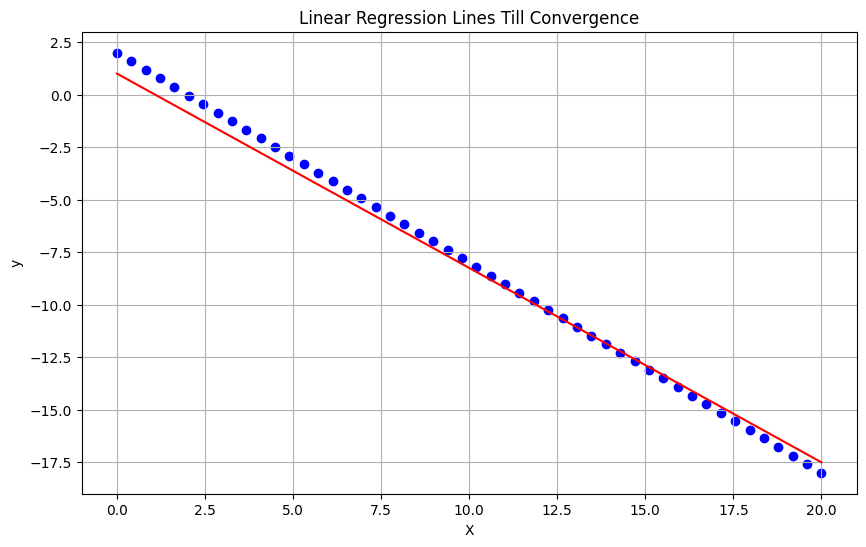

In [ ]:
best_regression_line(theta_0,theta_1,X,y)

##### The following results uses alpha = 0.0005, beta1 = 0.8, beta2 = 0.8, epsilon =  1e-08, and max. iterations = 5000.

In [44]:
thetas_0, thetas_1, loss_list, loss, h_x, theta_0, theta_1 = adam(X, y, alpha= 0.0005, B_1=0.8, B_2=0.8, epsilon=1e-08, max_iter=5000)

Converged at iteration 1584


In [45]:
r2_score(y,h_x)

0.9467806664066584

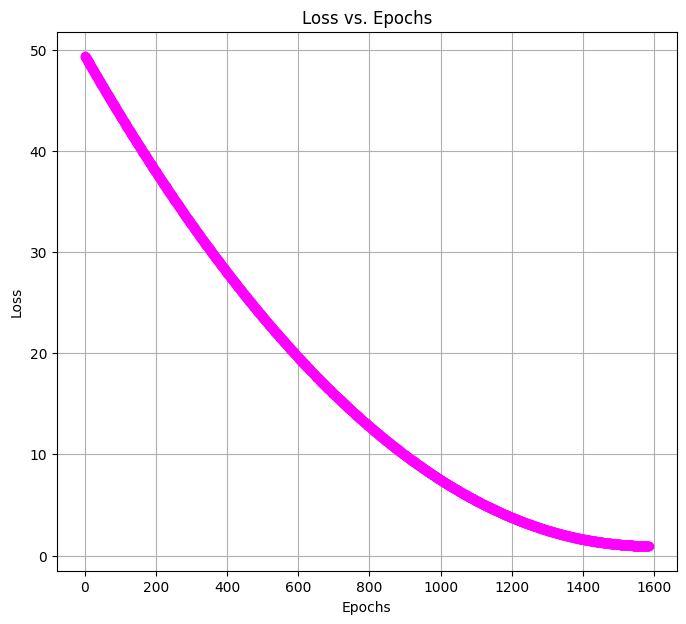

In [ ]:
loss_vs_epochs(loss_list)

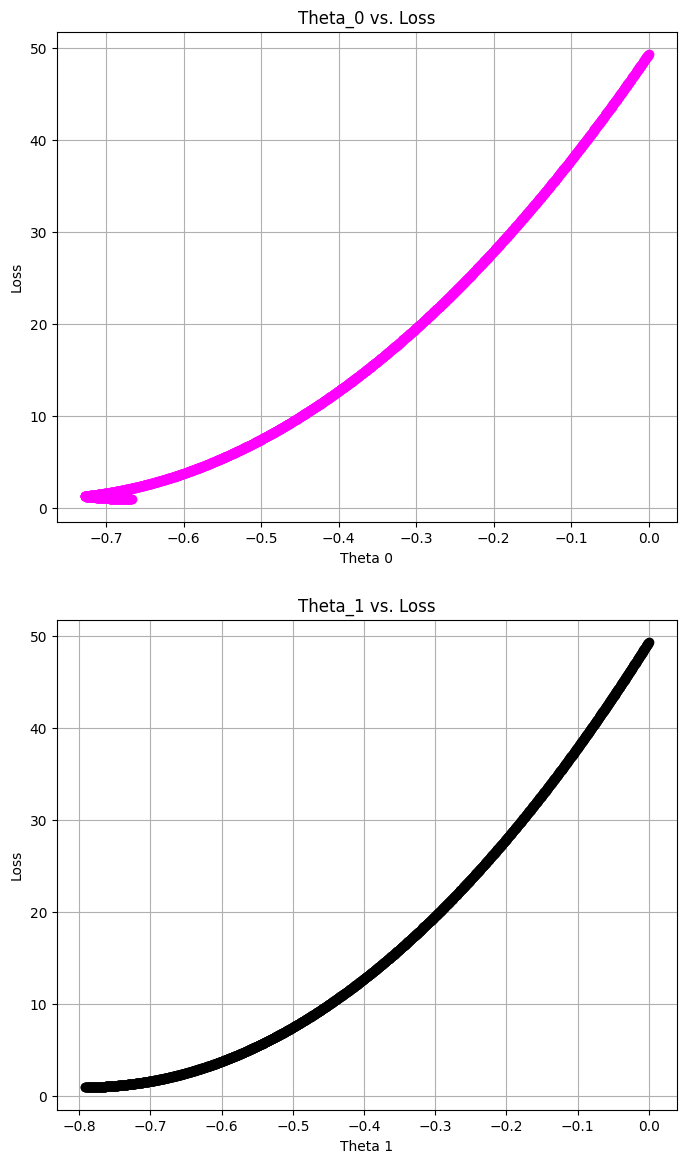

In [ ]:
theta_vs_loss(theta_0,theta_1,loss_list)

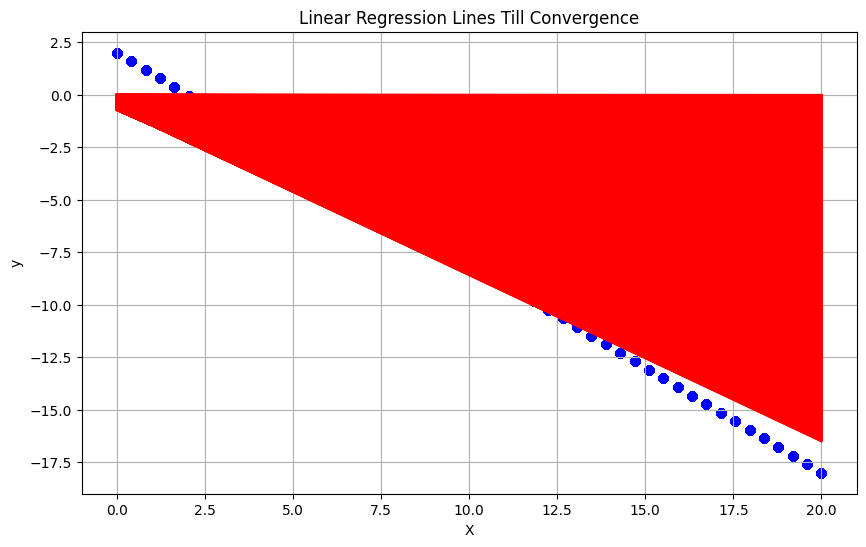

In [ ]:
regression_lines(thetas_0,thetas_1,X,y)

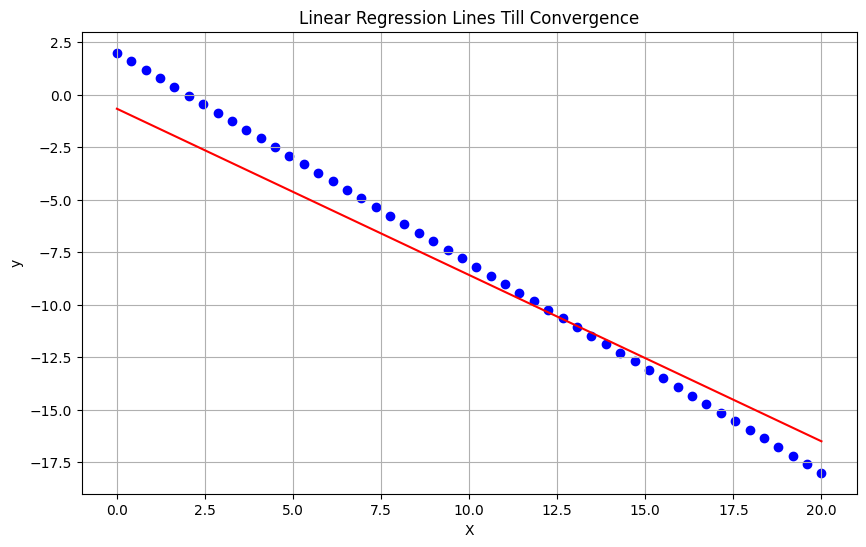

In [ ]:
best_regression_line(theta_0,theta_1,X,y)

### Play with the parameters and see the results

##### The following results uses alpha = 0.001, beta1 = 0.9, beta2 = 0.99, epsilon =  1e-08, and max. iterations = 5000.

In [46]:
thetas_0, thetas_1, loss_list, loss, h_x, theta_0, theta_1 = adam(X, y, alpha= 0.001, B_1=0.9, B_2=0.99, epsilon=1e-08, max_iter=5000)

Converged at iteration 1063


In [47]:
r2_score(y,h_x)

0.9485667803280174

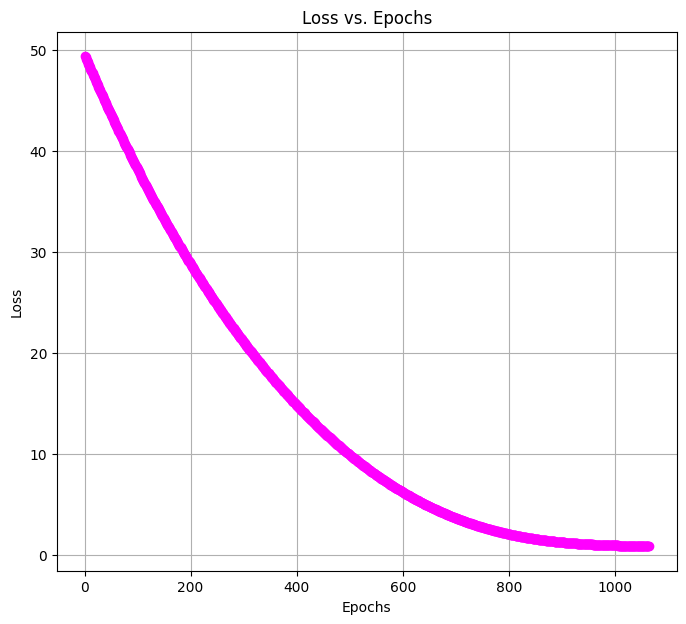

In [ ]:
loss_vs_epochs(loss_list)

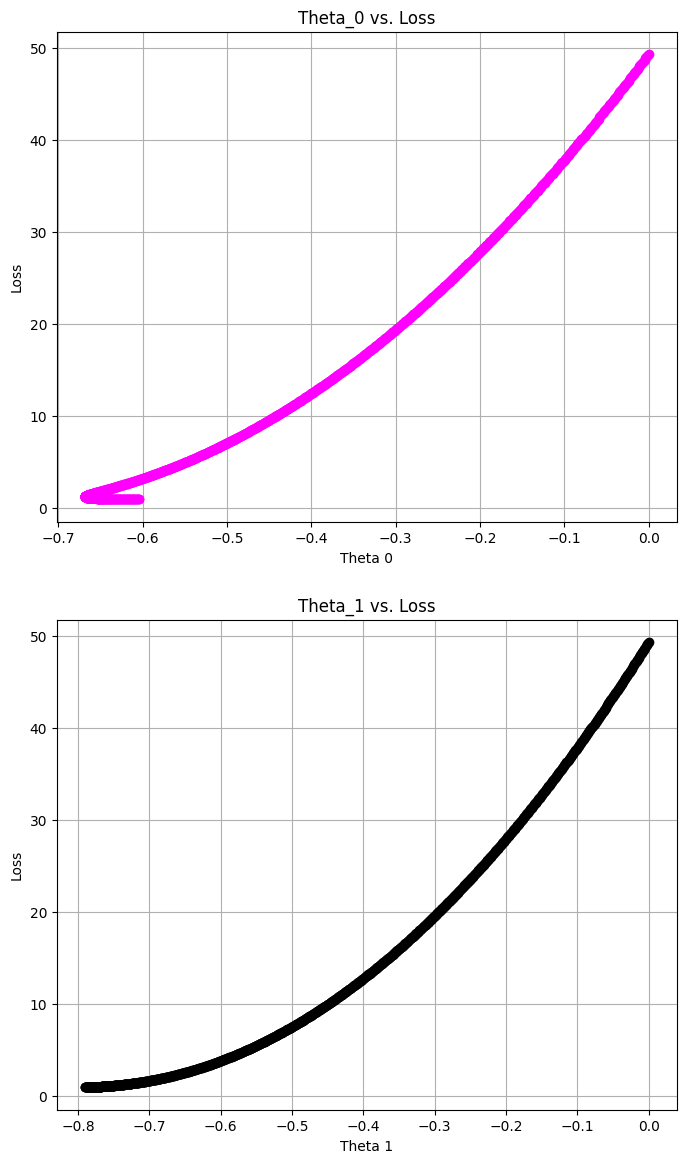

In [ ]:
theta_vs_loss(theta_0,theta_1,loss_list)

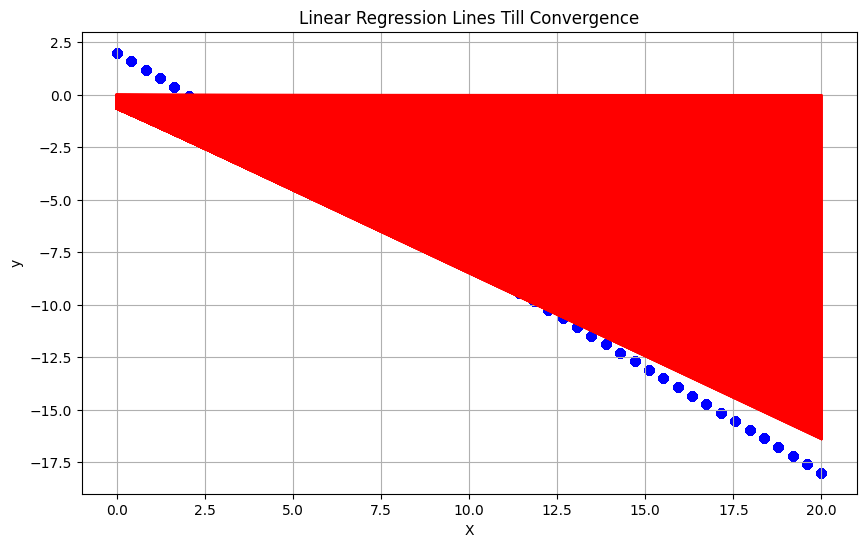

In [ ]:
regression_lines(thetas_0,thetas_1,X,y)

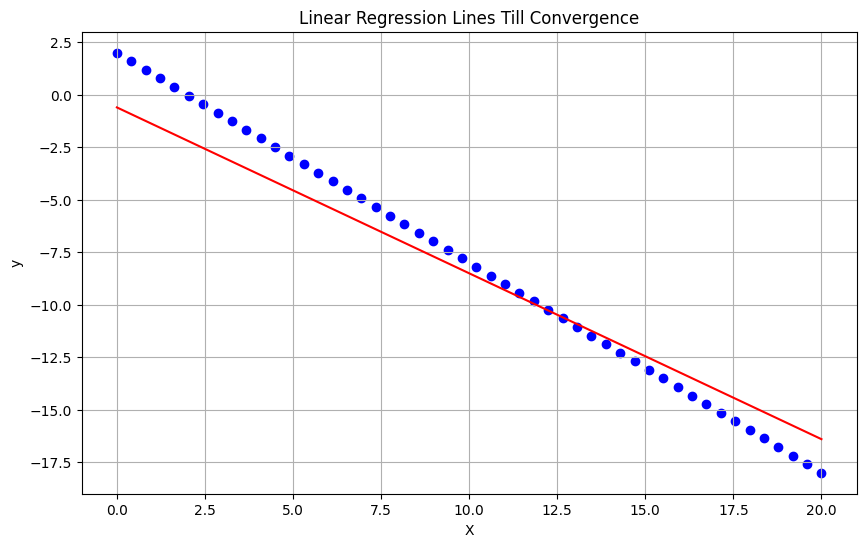

In [ ]:
best_regression_line(theta_0,theta_1,X,y)

##### The following results uses alpha = 0.001, beta1 = 0.9, beta2 = 0.5, epsilon =  1e-08, and max. iterations = 5000.

In [48]:
thetas_0, thetas_1, loss_list, loss, h_x, theta_0, theta_1 = adam(X, y, alpha= 0.001, B_1=0.9, B_2=0.5, epsilon=1e-08, max_iter=5000)

Converged at iteration 759


In [ ]:
r2_score(y,h_x)

0.944245878919177

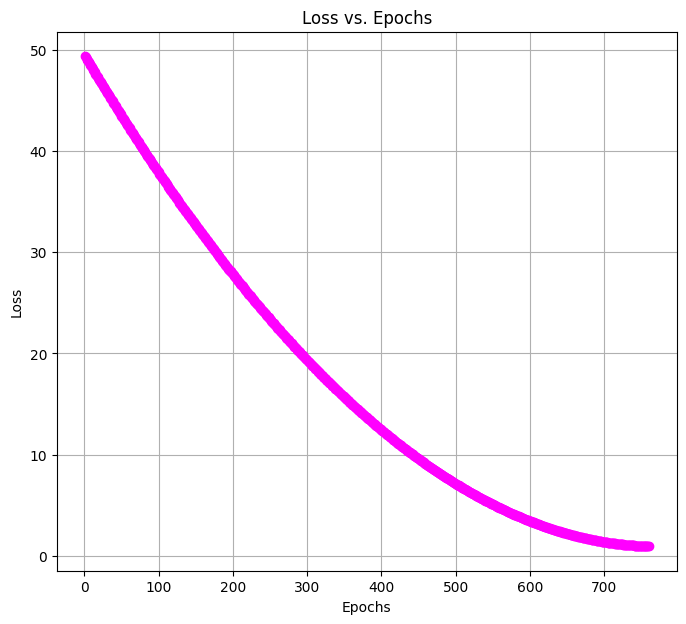

In [ ]:
loss_vs_epochs(loss_list)

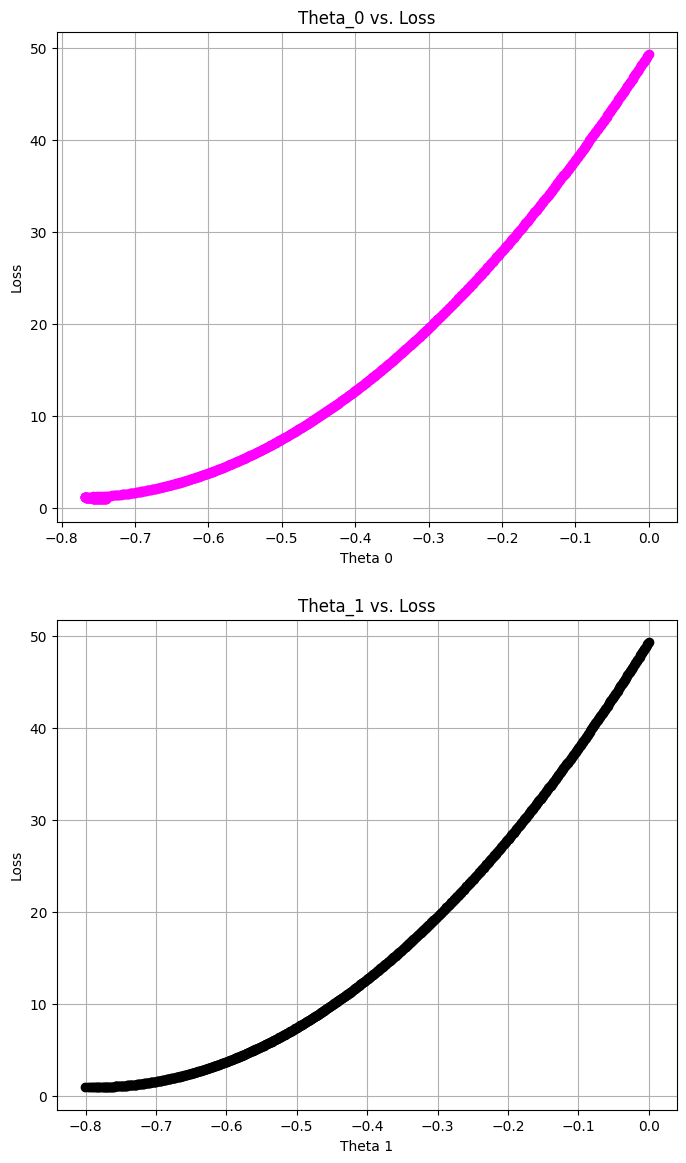

In [ ]:
theta_vs_loss(theta_0,theta_1,loss_list)

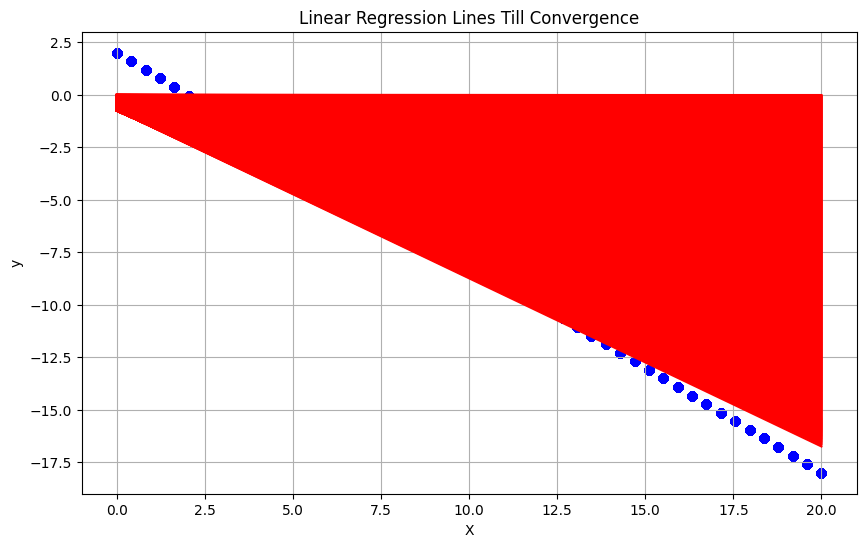

In [ ]:
regression_lines(thetas_0,thetas_1,X,y)

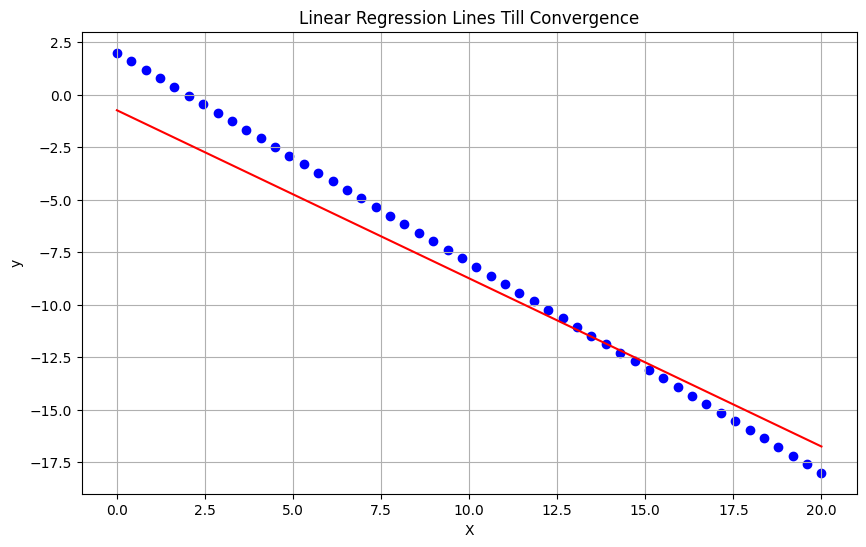

In [ ]:
best_regression_line(theta_0,theta_1,X,y)

##### The following results uses alpha = 0.001, beta1 = 0.5, beta2 = 0.99, epsilon =  1e-08, and max. iterations = 5000.

In [49]:
thetas_0, thetas_1, loss_list, loss, h_x, theta_0, theta_1 = adam(X, y, alpha= 0.001, B_1=0.5, B_2=0.99, epsilon=1e-08, max_iter=5000)

Converged at iteration 1090


In [ ]:
r2_score(y,h_x)

0.949344733641701

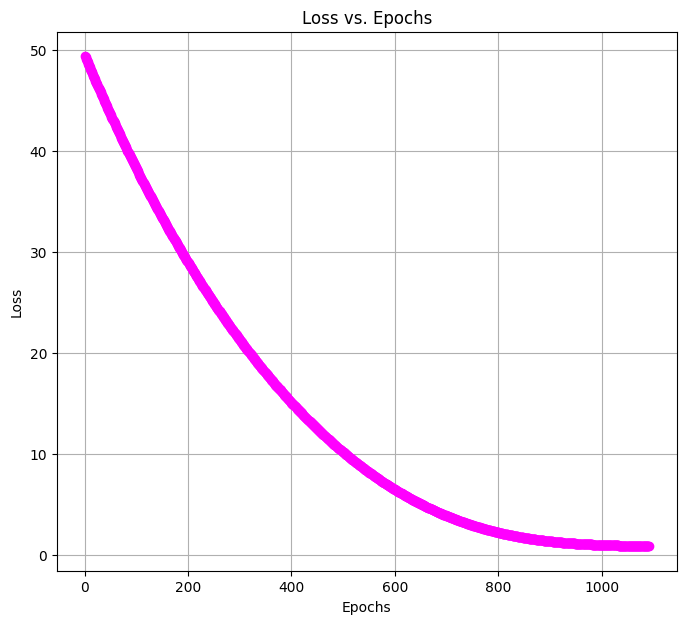

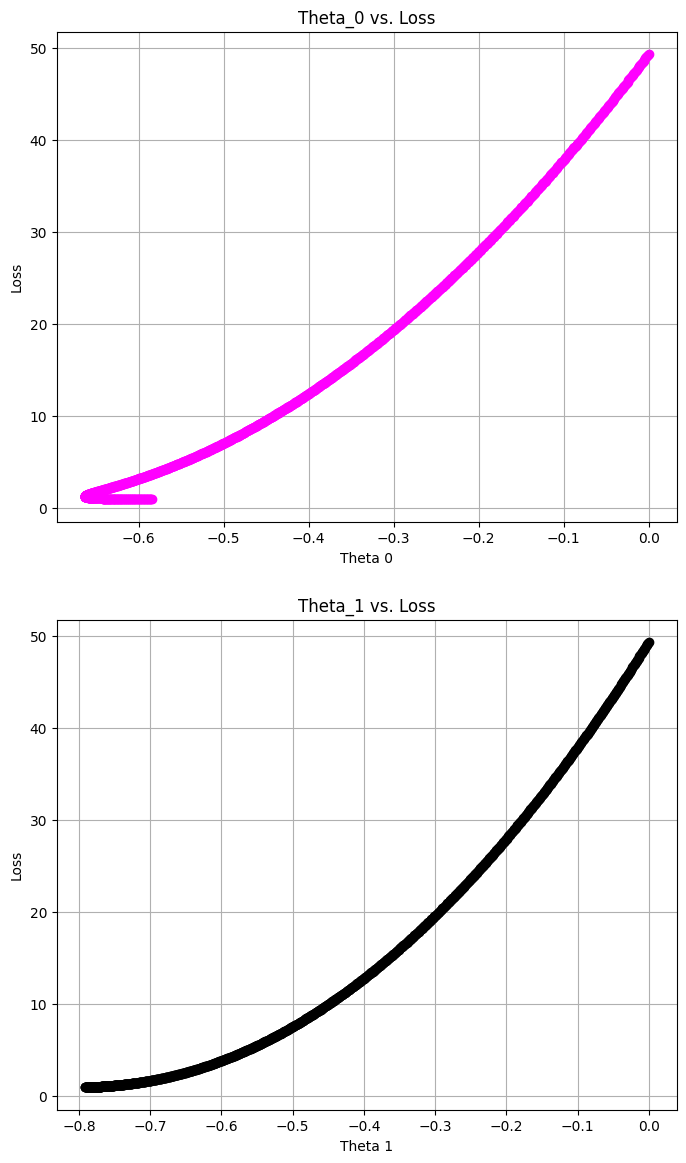

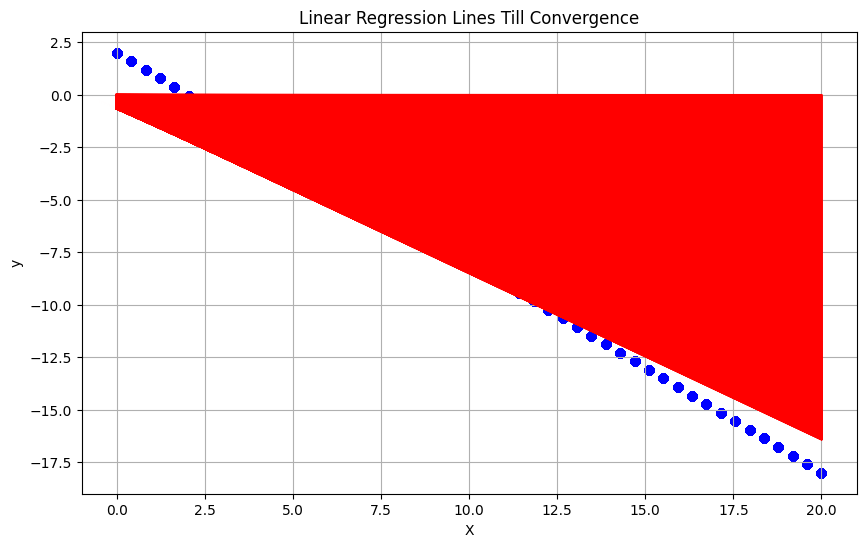

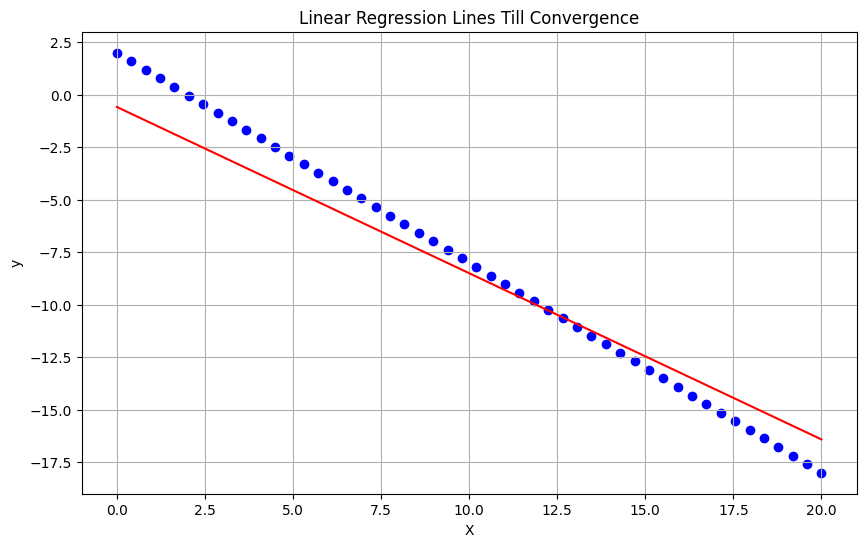

In [ ]:
loss_vs_epochs(loss_list)
theta_vs_loss(theta_0,theta_1,loss_list)
regression_lines(thetas_0,thetas_1,X,y)
best_regression_line(theta_0,theta_1,X,y)

##### The following results uses alpha = 0.01, beta1 = 0.9, beta2 = 0.99, epsilon =  1e-08, and max. iterations = 5000.

In [50]:
thetas_0, thetas_1, loss_list, loss, h_x, theta_0, theta_1 = adam(X, y, alpha= 0.01, B_1=0.9, B_2=0.99, epsilon=1e-08, max_iter=5000)

Converged at iteration 562


In [ ]:
r2_score(y,h_x)

0.9952892444628807

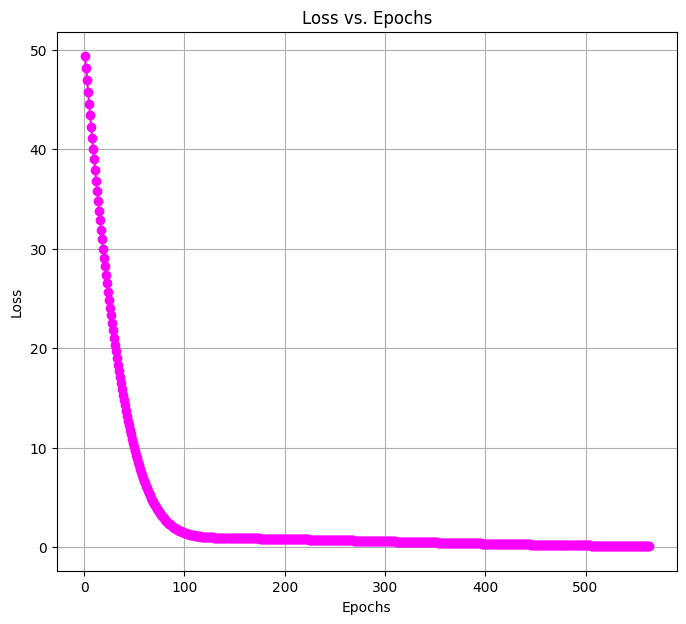

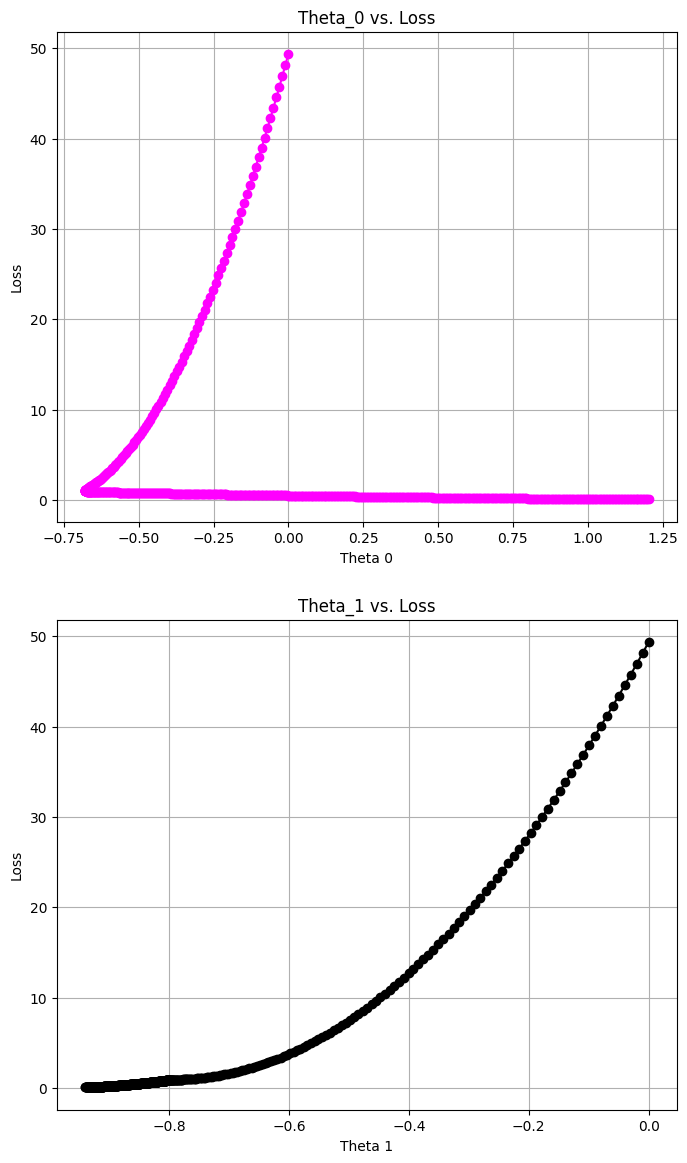

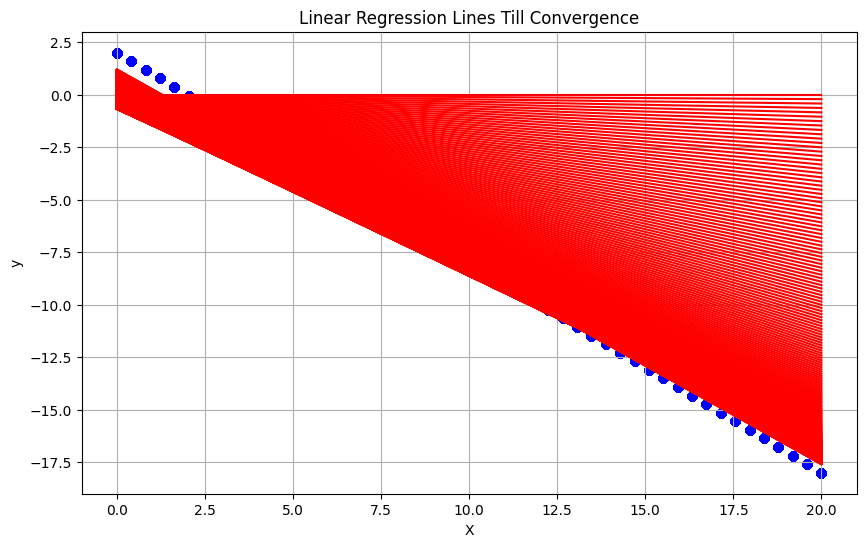

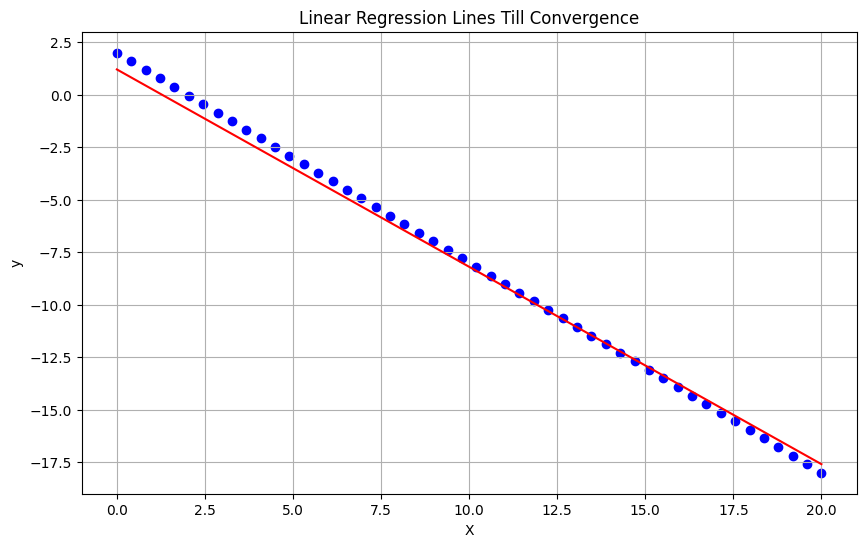

In [ ]:
loss_vs_epochs(loss_list)
theta_vs_loss(theta_0,theta_1,loss_list)
regression_lines(thetas_0,thetas_1,X,y)
best_regression_line(theta_0,theta_1,X,y)